<h1 style="font-size:26pt"> Prediction of Severity of Airplane Accident </h1>

Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

The aim is to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.

In this project, we will be comparing Bagging Methods with Bossting Methods to see which one gives a better accuracy. We will be using Decision Tree Classifier, Random Forest, Adaptive Boosting Classifier, Gradient Boosting Classifier and XGBoost Classifier.

# Import the Required Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data Set

The dataset consists of certain parameters recorded during the incident⁠ such as cabin temperature, turbulence experienced, number of safety complaints prior to the accident, number of days since the last inspection was conducted before the incident, an estimation of the pilot’s control given the various factors at play, and the likes. 

The benefits of practicing this problem by using Machine Learning techniques are as follows:

1. This challenge encouraged us to apply our Machine Learning skills to build models that can anticipate the severity of any airplane accident
2. This challenge helped us enhance our knowledge of classification actively. Classification is one of the basic building blocks of Machine Learning

In [126]:
df = pd.read_csv('airplane-accident-severity.csv')

# Exploration and Analysis of the Data Set

In [127]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 898.5+ KB


In [129]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [130]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [131]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [132]:
col = ['Severity','Violations','Accident_Type_Code']

In [133]:
train[col].astype('object').describe()

,Severity,Violations,Accident_Type_Code
count,10000,10000,10000
unique,4,6,7
top,0,2,4
freq,3049,3793,2057


# Visualization of the Data Set

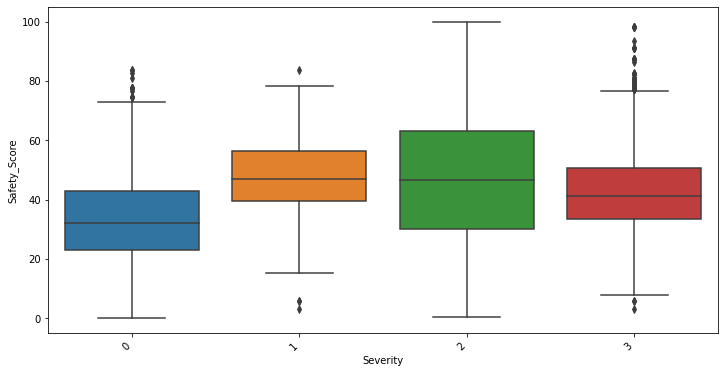

In [134]:
plt.figure(figsize=(12, 6))
chart = sns.boxplot(x = 'Severity', y = 'Safety_Score', data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [135]:
h = train.corr()

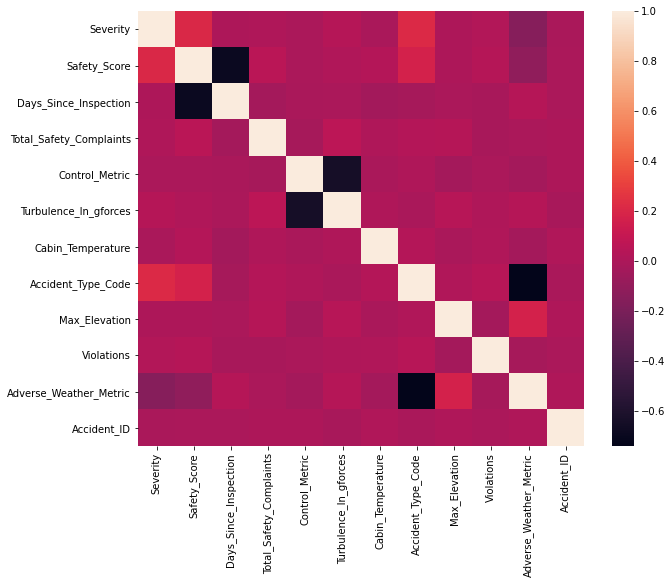

In [136]:
plt.figure(figsize=(10, 8))
sns.heatmap(h)
plt.show()

# With Safety Score

As can be observed from the heatmap above, the maximum correlation is with the Safety_Score attribute. Hence, we will compare the difference in accuracy of prediction by different Classification Models once, using the Safety_Score and the second time, without it.

## Using LabelEncoder() to encode the four categories of Severity

In [137]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [138]:
train['Severity']= en.fit_transform(train['Severity'])

## Splitting the Data Set into Training and Test Set

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Severity'], axis=1), train['Severity'], test_size=0.15,random_state=101)

In [140]:
print(X_train.shape)
print(X_test.shape)

(8500, 11)
(1500, 11)


## Bagging Methods

When training a model, no matter if we are dealing with a classification or a regression problem, we obtain a function that takes an input, returns an output and that is defined with respect to the training dataset. Due to the theoretical variance of the training dataset (we remind that a dataset is an observed sample coming from a true unknown underlying distribution), the fitted model is also subject to variability: if another dataset had been observed, we would have obtained a different model.

The idea of bagging is then simple: we want to fit several independent models and “average” their predictions in order to obtain a model with a lower variance. However, we can’t, in practice, fit fully independent models because it would require too much data. So, we rely on the good “approximate properties” of bootstrap samples (representativity and independence) to fit models that are almost independent.

### Decision Tree Classifier

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [141]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=10, 
                               random_state=101)

In [142]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=101)

In [143]:
dtc.score(X_train, y_train) * 100

97.43529411764705

In [144]:
dtc.score(X_test, y_test) * 100

94.53333333333333

In [145]:
from sklearn.metrics import classification_report, confusion_matrix

In [146]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       467
           1       0.92      0.94      0.93       363
           2       0.95      0.94      0.94       247
           3       0.96      0.96      0.96       423

    accuracy                           0.95      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.95      0.95      0.95      1500



In [147]:
print(confusion_matrix(y_test, dtc.predict(X_test)))

[[439  14   6   8]
 [ 11 343   4   5]
 [  3   6 232   6]
 [  5  11   3 404]]


### Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100, 
                             max_depth=10, 
                             random_state=101)

In [149]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=101)

In [150]:
rfc.score(X_train, y_train) * 100

96.36470588235294

In [151]:
rfc.score(X_test, y_test) * 100

89.2

In [152]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       467
           1       0.80      0.89      0.85       363
           2       0.91      0.85      0.88       247
           3       0.91      0.91      0.91       423

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.90      0.89      0.89      1500



In [153]:
print(confusion_matrix(y_test, rfc.predict(X_test)))

[[420  27   8  12]
 [  8 324  11  20]
 [  2  30 209   6]
 [ 14  22   2 385]]


## Boosting Methods

Boosting methods work in the same spirit as bagging methods: we build a family of models that are aggregated to obtain a strong learner that performs better. However, unlike bagging that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. 

Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). Boosting, like bagging, can be used for regression as well as for classification problems.

Being mainly focused at reducing bias, the base models that are often considered for boosting are models with low variance but high bias.

### Gradient Boosting Classifier

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,
                                 max_depth=10,
                                 learning_rate=0.2, 
                                 random_state=101)

In [155]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=10, random_state=101)

In [156]:
gbc.score(X_train, y_train) * 100

100.0

In [157]:
gbc.score(X_test, y_test) * 100

96.86666666666667

In [158]:
print(classification_report(y_test, gbc.predict(X_test)), confusion_matrix(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       467
           1       0.96      0.98      0.97       363
           2       0.96      0.98      0.97       247
           3       0.97      0.96      0.97       423

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500
 [[448   8   5   6]
 [  5 354   2   2]
 [  0   1 243   3]
 [  6   7   2 408]]


### Adaptive Boosting Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [159]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion='entropy', max_depth=10), 
                         n_estimators=100, 
                         learning_rate=0.2, 
                         random_state=101)

In [160]:
abc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10),
                   learning_rate=0.2, n_estimators=100, random_state=101)

In [161]:
abc.score(X_train, y_train) * 100

100.0

In [162]:
abc.score(X_test, y_test) * 100

94.93333333333334

In [163]:
print(classification_report(y_test, abc.predict(X_test)), confusion_matrix(y_test, abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       467
           1       0.91      0.97      0.94       363
           2       0.97      0.96      0.97       247
           3       0.95      0.95      0.95       423

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500
 [[432  22   3  10]
 [  5 351   3   4]
 [  1   2 238   6]
 [  6  12   2 403]]


### XGBoost Classifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [45]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [46]:
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

In [47]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy * 100.0)

96.39999999999999


# Without Safety Score

## Using LabelEncoder() to encode the four categories of Severity

In [165]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [166]:
train['Severity']= en.fit_transform(train['Severity'])

## Dropping the Safety_Score column

In [167]:
train1 = train.drop(['Safety_Score'], axis=1)
train1.head()

,Severity,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


## Splitting the Data Set into Training and Test Sets

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train1.drop(['Severity'], axis=1), train1['Severity'], test_size=0.15,random_state=101)

In [169]:
print(X_train.shape)
print(X_test.shape)

(8500, 10)
(1500, 10)


## Bagging Methods

### Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=10, 
                               random_state=101)

In [171]:
dtc1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=101)

In [172]:
dtc1.score(X_train, y_train)* 100

74.08235294117647

In [173]:
dtc1.score(X_test, y_test)*100 # it can be observed the accuracy has severely dropped from 92.6% to 53.73%

62.6

In [174]:
from sklearn.metrics import classification_report, confusion_matrix

In [175]:
print(classification_report(y_test, dtc1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       467
           1       0.56      0.55      0.55       363
           2       0.59      0.60      0.59       247
           3       0.71      0.71      0.71       423

    accuracy                           0.63      1500
   macro avg       0.62      0.62      0.62      1500
weighted avg       0.63      0.63      0.63      1500



In [176]:
print(confusion_matrix(y_test, dtc1.predict(X_test)))

[[291  78  37  61]
 [ 85 200  39  39]
 [ 38  37 147  25]
 [ 52  44  26 301]]


### Random Forest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(criterion='entropy', 
                             n_estimators=400, 
                             max_depth=20, 
                             random_state=101)

In [178]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=400,
                       random_state=101)

In [179]:
rfc1.score(X_train, y_train) * 100

99.94117647058823

In [180]:
rfc1.score(X_test, y_test) * 100 # accuracy has dropped from 90.53% to 66.6%

66.60000000000001

In [181]:
print(classification_report(y_test, rfc1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       467
           1       0.60      0.64      0.62       363
           2       0.62      0.64      0.63       247
           3       0.73      0.74      0.74       423

    accuracy                           0.67      1500
   macro avg       0.66      0.66      0.66      1500
weighted avg       0.67      0.67      0.67      1500



In [182]:
print(confusion_matrix(y_test, rfc1.predict(X_test)))

[[293  76  37  61]
 [ 56 233  38  36]
 [ 31  37 158  21]
 [ 46  40  22 315]]


## Boosting Methods

### Gradient Boosting Classifier

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier()

In [184]:
gbc1.fit(X_train, y_train)

GradientBoostingClassifier()

In [185]:
gbc1.score(X_train, y_train) * 100

66.82352941176471

In [186]:
gbc1.score(X_test, y_test) * 100 #accuracy dropped from 88.6% to 64.8%

64.73333333333333

In [187]:
print(classification_report(y_test, gbc1.predict(X_test)), confusion_matrix(y_test, gbc1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.60      0.64       467
           1       0.54      0.63      0.58       363
           2       0.61      0.63      0.62       247
           3       0.73      0.73      0.73       423

    accuracy                           0.65      1500
   macro avg       0.64      0.65      0.64      1500
weighted avg       0.65      0.65      0.65      1500
 [[278 100  31  58]
 [ 52 228  47  36]
 [ 26  47 155  19]
 [ 43  49  21 310]]


### Adaptive Boosting Classifier

In [188]:
from sklearn.ensemble import AdaBoostClassifier
abc1 = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion='entropy', max_depth=10), 
                         n_estimators=400, 
                         learning_rate=0.2, 
                         random_state=101)

In [ ]:
abc1.fit(X_train, y_train)

In [ ]:
abc1.score(X_train, y_train) * 100

In [ ]:
abc1.score(X_test, y_test) * 100 

### XGBoost Classifier

In [75]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [76]:
xgb1 = XGBClassifier(learning_rate =0.3,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [77]:
y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred]

In [78]:
accuracy = accuracy_score(y_test, predictions)
print((accuracy * 100.0))                   #gives the highest possible accuracy among all the classifiers 

70.06666666666666


# Comparison Table for all the Classifiers



|Classifier | With Safety Score (accuracy %) | Without Safety Score (accuracy %) |
| --- | --- | --- |
|Decision Tree Classifier |  94.54 | 53.73 |
|Random Forest Classifier |  89.92 | 66.60 |
|Gradient Boosting Classifier |  96.87 | 64.80 |
|Adaptive Boosting Classifier |  94.94 | 64.93 |
|XGBoost Classifier |  96.4 | 70.07 |

It can be concluded that Boosting methods are more accurate if tuned correctly. XGBoost Classifier has given the best result with and without Safety Score.